In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [21]:
#load csv of top 4 of each team

top_four = ("../ClippersScripts_ha/final_top_df.csv")
top_four_df = pd.read_csv(top_four)
top_four_df

,YEAR,PLAYER,POSITION,TEAM,SALARY,AGE,GP,W,L,MIN,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
0,2017,Stephen Curry,PG,Golden State Warriors,37457154,30,51,41,10,32.0,...,6.1,3.0,1.6,0.2,2.2,43.8,5,0,9.5,1
1,2018,Stephen Curry,PG,Golden State Warriors,37457154,31,69,52,17,33.8,...,5.2,2.8,1.3,0.4,2.4,43.8,3,0,10.0,1
2,2019,Stephen Curry,PG,Golden State Warriors,40231758,31,4,1,3,28.0,...,6.5,3.8,1.3,0.5,2.5,37.5,1,0,-8.0,1
3,2018,LeBron James,SF,Los Angeles Lakers,35654150,34,55,28,27,35.2,...,8.3,3.6,1.3,0.6,1.7,52.0,32,8,2.1,3
4,2019,LeBron James,SF,Los Angeles Lakers,37436858,35,38,32,6,34.9,...,10.7,3.7,1.3,0.5,1.8,52.7,29,9,9.6,7
5,2019,Kawhi Leonard,SF,LA Clippers,32742000,28,30,22,8,32.2,...,5.1,3.4,1.9,0.5,2.0,46.3,8,0,7.7,12
6,2018,Harrison Barnes,SF,Sacramento Kings,24107258,27,28,11,17,33.9,...,1.9,1.1,0.6,0.1,1.5,24.7,3,0,0.9,30
7,2019,Harrison Barnes,SF,Sacramento Kings,24147727,27,40,15,25,35.1,...,2.2,1.3,0.7,0.2,1.2,25.3,3,0,-0.7,46


In [23]:
#see column titles
top_four_df.columns

Index(['YEAR', 'PLAYER', 'POSITION', 'TEAM', 'SALARY', 'AGE', 'GP', 'W', 'L',
       'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP',
       'DD2', 'TD3', '+/-', 'RK'],
      dtype='object')

In [30]:
top_four_reduced_df = top_four_df[['YEAR', 'PLAYER', 'POSITION', 'TEAM', 'SALARY', 'PTS', 'FGM', 'FTA', 'DREB', 'AST', 'TOV', 'GP', '3PM', '3P%']]
top_four_reduced_df

,YEAR,PLAYER,POSITION,TEAM,SALARY,PTS,FGM,FTA,DREB,AST,TOV,GP,3PM,3P%
0,2017,Stephen Curry,PG,Golden State Warriors,37457154,26.4,8.4,5.9,4.4,6.1,3.0,51,4.2,42.3
1,2018,Stephen Curry,PG,Golden State Warriors,37457154,27.3,9.2,4.2,4.7,5.2,2.8,69,5.1,43.7
2,2019,Stephen Curry,PG,Golden State Warriors,40231758,20.3,6.8,4.5,4.0,6.5,3.8,4,2.3,24.3
3,2018,LeBron James,SF,Los Angeles Lakers,35654150,27.4,10.1,7.6,7.4,8.3,3.6,55,2.0,33.9
4,2019,LeBron James,SF,Los Angeles Lakers,37436858,25.5,9.8,5.6,6.8,10.7,3.7,38,2.1,35.1
5,2019,Kawhi Leonard,SF,LA Clippers,32742000,25.8,9.1,6.5,6.4,5.1,3.4,30,1.8,34.6
6,2018,Harrison Barnes,SF,Sacramento Kings,24107258,14.3,5.0,2.9,4.8,1.9,1.1,28,1.9,40.8
7,2019,Harrison Barnes,SF,Sacramento Kings,24147727,15.2,5.2,4.4,3.9,2.2,1.3,40,1.4,35.1


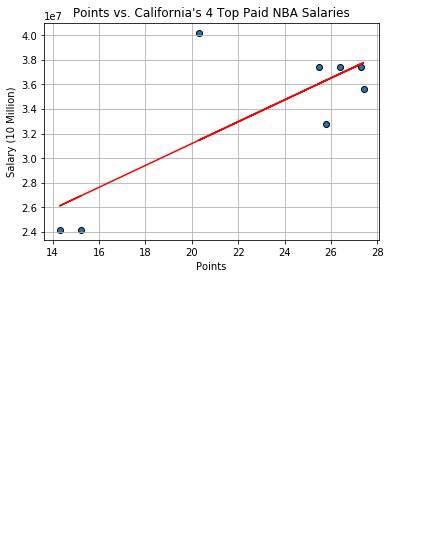

The r-squared is: 0.7762239115392884


In [63]:
x_pts = top_four_reduced_df['PTS']
y_sal = top_four_reduced_df['SALARY']
plt.scatter(x_pts,y_sal,marker = 'o',edgecolors = 'black')
plt.title("Points vs. California's 4 Top Paid NBA Salaries")
plt.xlabel("Points")
plt.ylabel("Salary (10 Million)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_pts, y_sal)
regress_values = x_pts * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_pts,regress_values,"r-")
plt.annotate(line_eq,(20,6),fontsize=15,color="red")
plt.show()
print(f"The r-squared is: {rvalue}")